In [1]:
# List of packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# List of countries
countries = ["Iran", "Spain", "France", "Austria", 
             "United Kingdom", "United States", "Italy",
            "Germany", "France", "South Korea", "Switzerland",
            "Netherlands"]

In [3]:
# Load data
data = pd.read_csv("full_data_2020_03_19.csv", sep=',', header='infer')
data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [4]:
# Filter dataset based on selected countries
data_sel = data.loc[data['location'].isin(countries)]
data_sel.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
155,2020-02-26,Austria,NaN,NaN,2,NaN
156,2020-02-27,Austria,0.0,NaN,2,NaN
157,2020-02-28,Austria,2.0,NaN,4,NaN
158,2020-02-29,Austria,1.0,NaN,5,NaN
159,2020-03-01,Austria,5.0,NaN,10,NaN


In [5]:
# Select columns ("total_cases") 
data = data_sel[["date", "location", "total_cases"]]
data.head()

,date,location,total_cases
155,2020-02-26,Austria,2
156,2020-02-27,Austria,2
157,2020-02-28,Austria,4
158,2020-02-29,Austria,5
159,2020-03-01,Austria,10


In [6]:
# Pivot the dataframe
df = data.pivot_table(index=['date'], 
            columns=['location'], values='total_cases').fillna(0)
df = pd.DataFrame(df.to_records())
df.head()



,date,Austria,France,Germany,Iran,Italy,Netherlands,South Korea,Spain,Switzerland,United Kingdom,United States
0,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
4,2020-01-25,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0


In [7]:
# Date normalization and filtering
df['date'] = df['date'].astype(str)
df['date'] = df['date'].str.replace('-','')
df['date'] = df['date'].astype(int)
df.head()

# filter dates
START_DATE = 20200220
df = df[df['date'] > START_DATE]

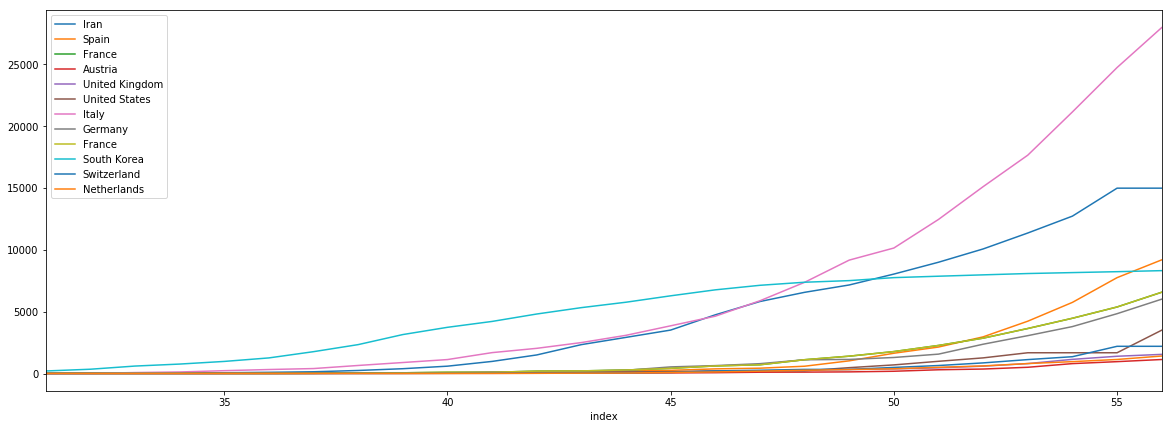

In [8]:
# Data visualization
df.reset_index().plot(figsize=(20, 7), x='index', y=countries)
plt.show()